In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Data/loan_application.csv')
data.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [3]:
data.nunique()

Application_ID        511
Gender                  2
Married                 2
Dependents              4
Education               2
Self_Employed           2
Credit_History          2
Property_Area           3
Income                  3
Application_Status      2
dtype: int64

In [4]:
data.shape

(511, 10)

In [5]:
data.isna().sum()

Application_ID        0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Credit_History        0
Property_Area         0
Income                0
Application_Status    0
dtype: int64

In [6]:
data_df=data.drop(columns='Application_ID')

In [7]:
data_df=pd.get_dummies(data_df,drop_first=True)
data_df.head()

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Income_low,Income_medium,Application_Status_Y
0,1,1,0,0,0,0,0,0,0,1,0,1,1
1,1,1,1,1,0,0,0,0,0,0,0,1,0
2,1,1,1,0,0,0,0,1,0,1,1,0,1
3,1,1,1,0,0,0,1,0,0,1,1,0,1
4,1,1,0,0,0,0,0,0,0,1,0,1,1


In [8]:
X=data_df.drop(columns='Application_Status_Y')
y=data_df['Application_Status_Y']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=21)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [12]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,roc_auc_score
from sklearn.metrics import roc_curve,precision_recall_curve

In [13]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
svm=SVC()

In [14]:
models={
    lr:'LogisticRegression',
    dt:'DecisionTreeClassifier',
    rf:'RandomForestClassifier',
    gb:'GradientBoostingClassifier',
    svm:'SVM'
}

In [15]:
result=[]
for i in models:
    temp_res=dict()
    i.fit(X_train,y_train)
    y_pred=i.predict(X_test)
    temp_res['Model']=models[i]
    temp_res['Precision']=precision_score(y_test,y_pred)
    temp_res['Recall']=recall_score(y_test,y_pred)
    temp_res['F1 Score']=accuracy_score(y_test,y_pred)
    temp_res['Accuracy']=f1_score(y_test,y_pred)
    temp_res['ROC_AUC']=roc_auc_score(y_test,y_pred)
    result.append(temp_res)
pd.DataFrame(result)

,Model,Precision,Recall,F1 Score,Accuracy,ROC_AUC
0,LogisticRegression,0.757812,0.960396,0.772727,0.847162,0.687745
1,DecisionTreeClassifier,0.757282,0.772277,0.688312,0.764706,0.650290
2,RandomForestClassifier,0.762712,0.891089,0.746753,0.821918,0.681394
3,GradientBoostingClassifier,0.758333,0.900990,0.746753,0.823529,0.676910
4,SVM,0.759690,0.970297,0.779221,0.852174,0.692696


In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

In [18]:
grid = GridSearchCV(svm, param_grid, refit = True, verbose = 3)

In [19]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.694, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.681, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.690, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.690, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.690, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.694, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [20]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [21]:
grid.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
svm=SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
svm.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
y_pred=svm.predict(X_test)

In [25]:
result=[]
temp_res=dict()
temp_res['Model']='SVM'
temp_res['Precision']=precision_score(y_test,y_pred)
temp_res['Recall']=recall_score(y_test,y_pred)
temp_res['F1 Score']=accuracy_score(y_test,y_pred)
temp_res['Accuracy']=f1_score(y_test,y_pred)
temp_res['ROC_AUC']=roc_auc_score(y_test,y_pred)
result.append(temp_res)
pd.DataFrame(result)

,Model,Precision,Recall,F1 Score,Accuracy,ROC_AUC
0,SVM,0.75969,0.970297,0.779221,0.852174,0.692696


### ROC Curve

In [26]:
ns_probs = [0 for _ in range(len(y_test))]

In [27]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

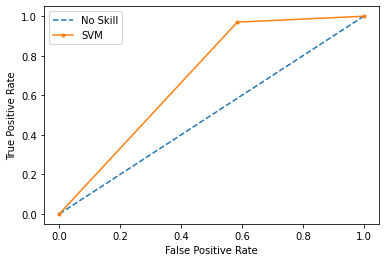

In [28]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [29]:

import pickle

with open('Models/svm.pkl','wb') as f:
    pickle.dump(svm,f)
    print('done...!!!')

done...!!!
